# Day03 Assignment

* dataset
    - https://www.kaggle.com/c/titanic
    - 위의 파일 수정

1. 첨부된 데이터 파일을 불러와서
2. 데이터의 일부 확인하기 head, tail
3. 그래프
    1. 연령대 히스토그램
    2. 객실 등급별 -> 생존여부 (Survived) - 막대
    3. 성별 -> 생존여부(Survived) - 막대

## 0. 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 경고 메시지가 나타나지 않게
import warnings
warnings.filterwarnings('ignore')

## 0. 폰트 적용

In [2]:
from matplotlib import font_manager # 폰트 매니저 불러오기
#font_manager.fontManager.ttflist

# for f in font_manager.fontManager.ttflist:
#     if 'Gothic' in f.name or 'Myung' in f.name:
#         print(f.name, f.fname)
        
plt.rc('font', family='Yu Gothic')

## 1. 첨부된 데이터 파일을 불러와서

In [3]:
titanic = pd.read_csv('../data/titanic.csv', index_col = 0)

## 2. 데이터 확인 (head, tail,info)

In [4]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 153.4+ KB


## 3. 그래프

### A.연령대 히스토그램

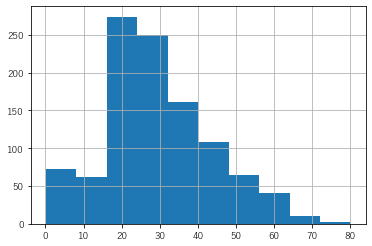

In [7]:
# 1. 연령대를 선택
titanic['age']
# 2. 히스토그램 그리기
graph = titanic['age'].hist(bins=10)
plt.show()

### B.객실 등급별 -> 생존여부 (Survived) - 막대

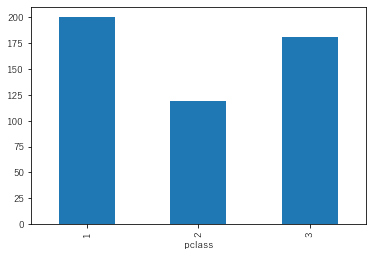

In [8]:
titanic.groupby('pclass').sum()['survived'].plot.bar()
# titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().plot.bar()

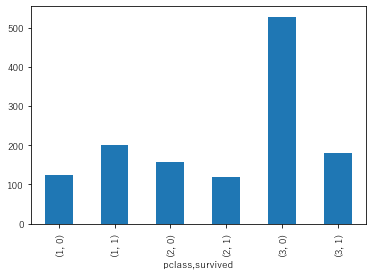

In [14]:
# 생존자, 사망자 Grouping
titanic.groupby(['pclass', 'survived']).count()['name'].plot.bar() # name외에 결측치 없는 다른데이터 (sex, age 등) 선택가능

### C.성별 -> 생존여부(Survived) - 막대

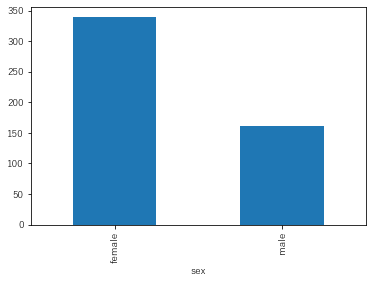

In [9]:
titanic.groupby('sex').sum()['survived'].plot.bar()
# titanic[['sex', 'survived']].groupby(['sex'], as_index=True).mean().plot.bar()

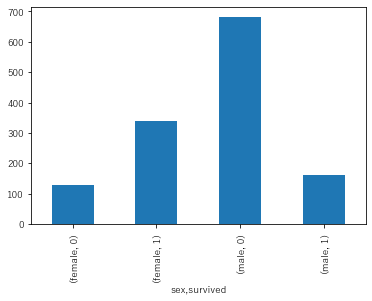

In [15]:
# 생존자, 사망자 Grouping
titanic.groupby(['sex', 'survived']).count()['name'].plot.bar() # name외에 결측치 없는 다른데이터 (age, pclass 등) 선택가능